In [1]:
import nibabel as nib
import nilearn.plotting  as niplt
import numpy as np
import glob
import matplotlib.pyplot as plt

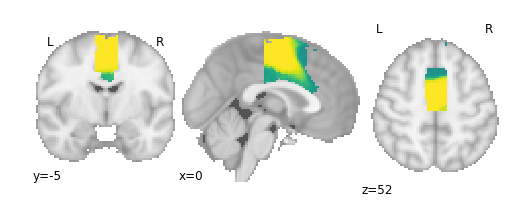

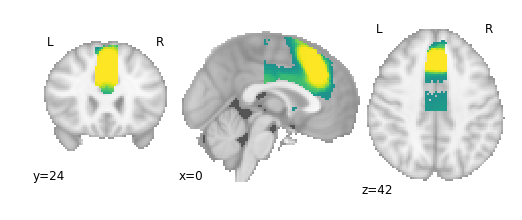

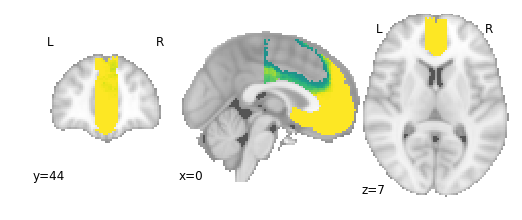

In [10]:
for i in range(0, 3):
    combined_parcels = []
    for f in glob.glob('../results/clustering/results/MFC/kmeans_*_3/cluster_labels_k3.nii.gz'):
        img = nib.load(f)
        data = np.round(img.get_data())
        x, y, z = np.meshgrid(*map(np.arange, data.shape), indexing='ij')
        order, com = zip(*sorted([(1, np.mean(y[data == 1.0])), (2, np.mean(y[data == 2.0])), (3, np.mean(y[data == 3.0]))],  key=lambda tup: tup[1]))
        data[data != order[i]] = 0
        data[data == order[i]] = 100

        combined_parcels.append(data)

    combined_parcels = np.array(combined_parcels)
    avg_parcels = combined_parcels.mean(axis=0)

    avg_img = nib.nifti1.Nifti1Image(avg_parcels, img.get_affine(), img.get_header())
    niplt.plot_stat_map(avg_img, cmap=plt.get_cmap('viridis'), colorbar=False, draw_cross=False)